In [14]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_zomato = pd.read_csv('zomato.csv')
df_zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df_zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
#Deleting unnecessary columns
new_zomato = df_zomato.drop(columns = ['dish_liked', 'phone', 'url'], axis = 1)

In [6]:
#Removing the duplicates
new_zomato.duplicated().sum()
new_zomato.drop_duplicates(inplace = True)

In [7]:
#Checking Nan values and removing from the dataset
new_zomato.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7767
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     345
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [8]:
new_zomato.dropna(how = 'any', inplace = True)

In [9]:
new_zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [10]:
#Rename column names
new_zomato = new_zomato.rename(columns = {'approx_cost(for two people)' : 'cost', 'listed_in(type)' : 'type', 'listed_in(city)' : 'city'})
new_zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [11]:
#Transformations
#Changing the cost of string
new_zomato['cost'] = new_zomato['cost'].astype(str)

#using lambda function to replace ',' from cost
new_zomato['cost'] = new_zomato['cost'].apply(lambda x: x.replace(',', '.'))

#changing the cost of float
new_zomato['cost'] = new_zomato['cost'].astype(float)
new_zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [17]:
# Reading rate of dataset
new_zomato['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [18]:
# removing /5 from the dataset
new_zomato = new_zomato.loc[new_zomato.rate != 'NEW']
new_zomato = new_zomato.loc[new_zomato.rate != '-'].reset_index(drop = True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
new_zomato.rate = new_zomato.rate.apply(remove_slash).str.strip().astype('float')
new_zomato['rate'].head()

AttributeError: Can only use .str accessor with string values!

In [19]:
##Adjust the column names
new_zomato.name = new_zomato.name.apply(lambda x: x.title())
new_zomato.online_order.replace(('Yes', 'No'), (True, False), inplace = True)
new_zomato.book_table.replace(('Yes', 'No'), (True, False), inplace = True)
new_zomato.cost.unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,   1.1 ,
         1.6 , 230.  , 130.  ,   1.7 ,   1.35,   2.2 ,   1.4 ,   2.  ,
         1.8 ,   1.9 , 180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,
         3.4 ,  50.  ,  40.  ,   1.25,   3.5 ,   4.  ,   2.4 ,   2.6 ,
         1.45,  70.  ,   3.2 , 240.  ,   6.  ,   1.05,   2.3 ,   4.1 ,
       120.  ,   5.  ,   3.7 ,   1.65,   2.7 ,   4.5 ,  80.  ])

In [21]:
#Encode the input variables
def Encode(new_zomato):
    for column in new_zomato.columns[~new_zomato.columns.isin(['rate', 'cost', 'votes'])]:
        new_zomato[column] = new_zomato[column].factorize()[0]
    return new_zomato

new_zomato_en = Encode(new_zomato.copy())

In [22]:
new_zomato_en.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

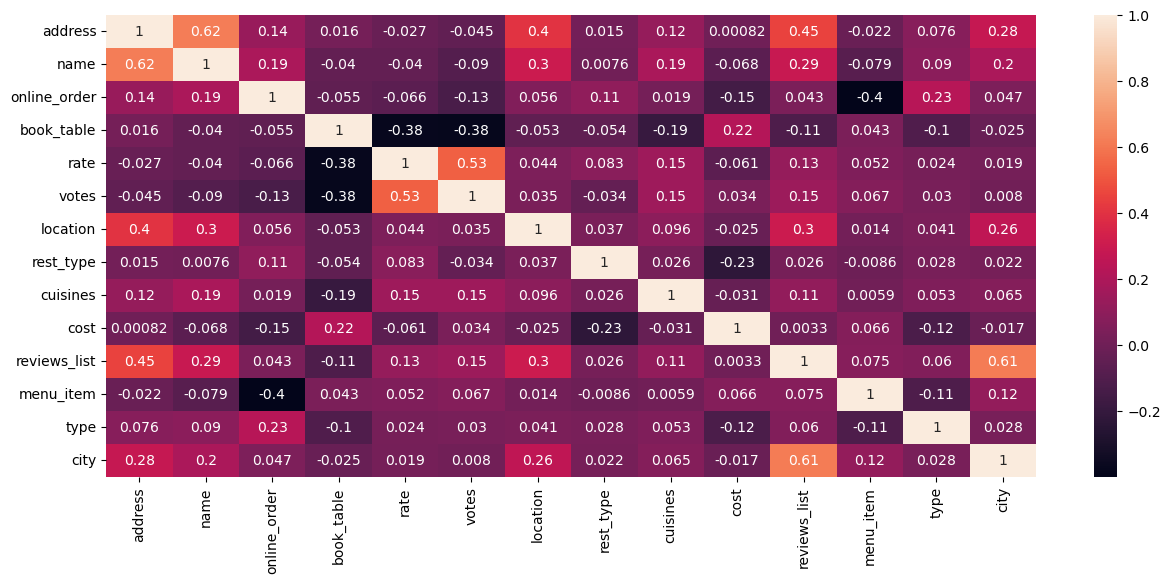

In [23]:
#Correlation between different varibale
corr = new_zomato_en.corr(method = 'kendall')
plt.figure(figsize = [15,6])
sns.heatmap(corr, annot= True)
new_zomato_en.columns

Text(0.5, 1.0, 'Restaurants deliverying online or Not')

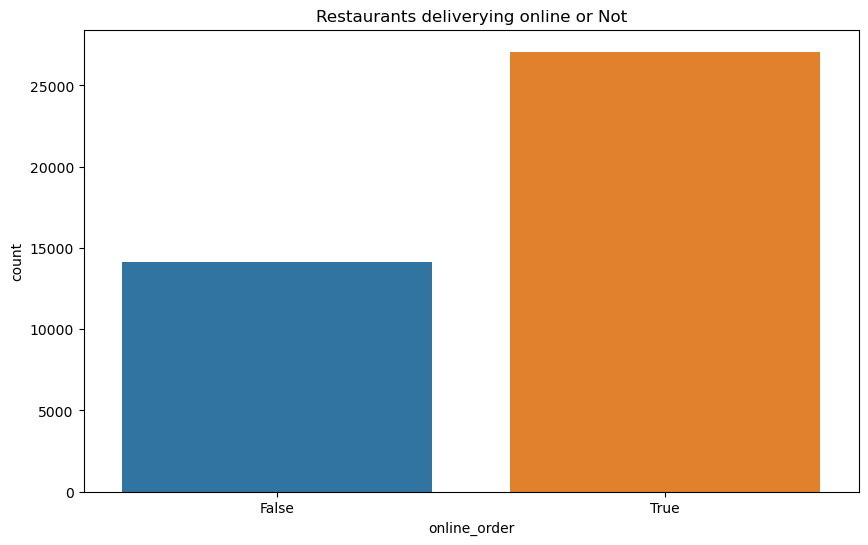

In [24]:
#Restaurants deliverying online or not
plt.figure(figsize = [10, 6])
sns.countplot(x = new_zomato['online_order'])
plt.title('Restaurants deliverying online or Not')

Text(0.5, 1.0, 'Restaurants allowing table booking or Not')

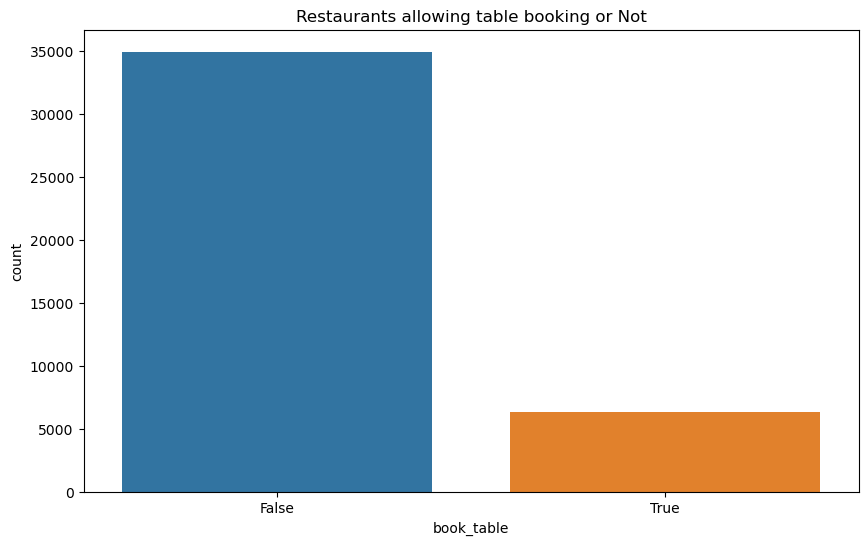

In [25]:
#Restaurants allowing booking table or Not
plt.figure(figsize = [10, 6])
sns.countplot(x = new_zomato['book_table'])
plt.title('Restaurants allowing table booking or Not')

Text(0.5, 1.0, 'location')

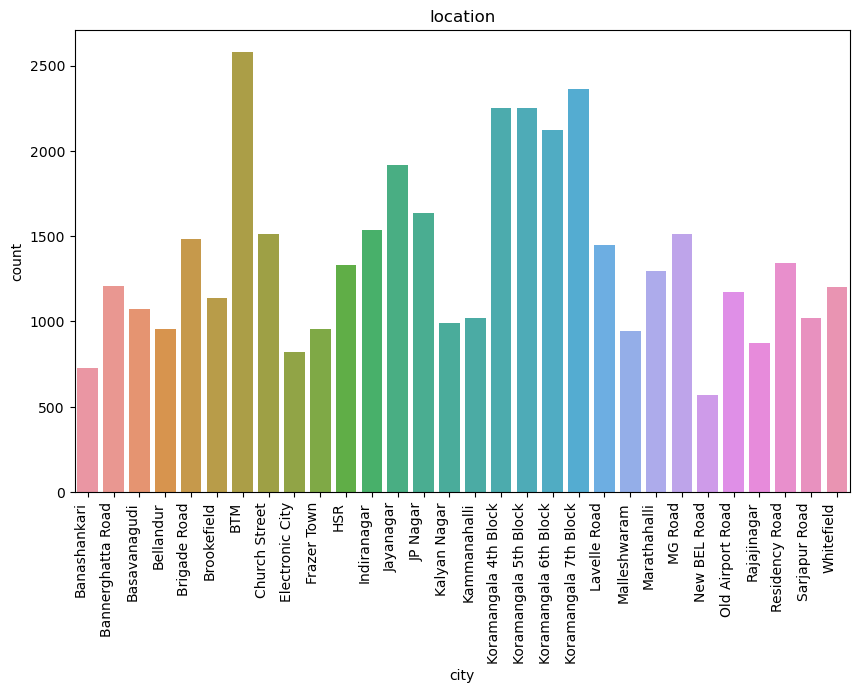

In [27]:
#available locations
plt.figure(figsize = [10, 6])
sns.countplot(x = new_zomato['city'])
sns.countplot( x = new_zomato['city']).set_xticklabels(sns.countplot(x = new_zomato['city']).get_xticklabels(), rotation = 90, ha = 'right')
plt.title('location')

Text(0.5, 1.0, 'Type of service')

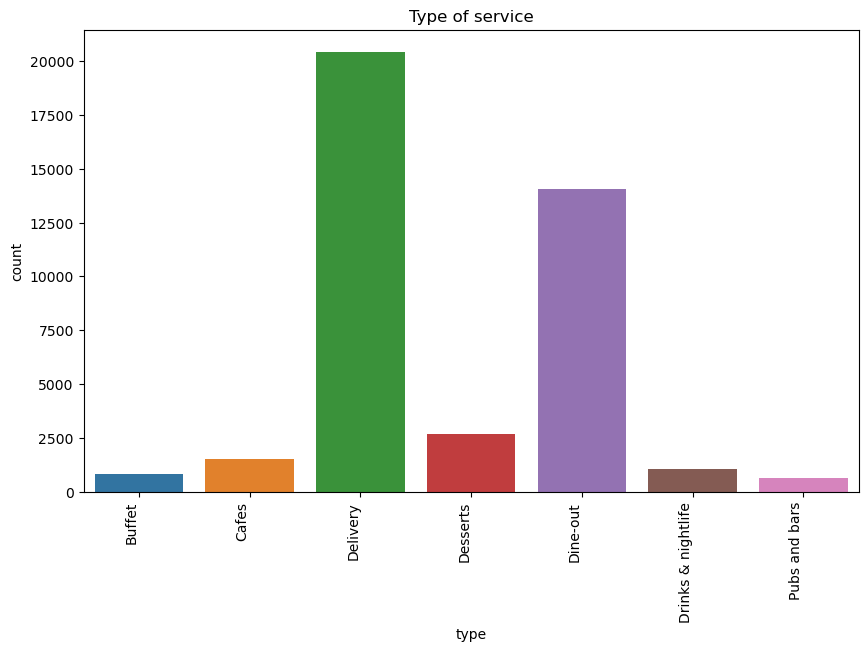

In [29]:
plt.figure(figsize = [10, 6])
sns.countplot(x = new_zomato['type'])
sns.countplot( x = new_zomato['type']).set_xticklabels(sns.countplot(x = new_zomato['type']).get_xticklabels(), rotation = 90, ha = 'right')

plt.title('Type of service')

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

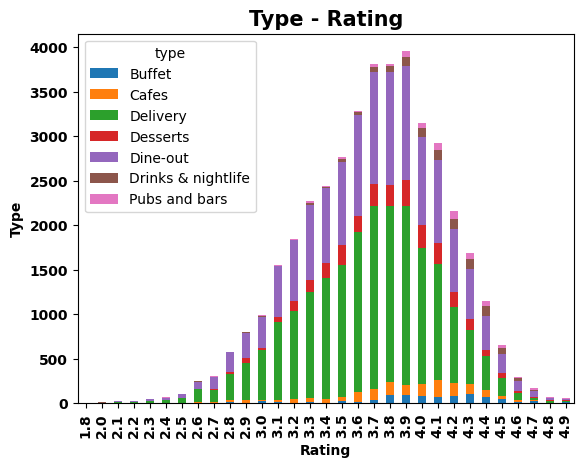

In [30]:
# Checking Type and rating
type_plt = pd.crosstab(new_zomato['rate'], new_zomato['type'])
type_plt.plot(kind = 'bar', stacked = True)
plt.title('Type - Rating', fontsize = 15, fontweight = 'bold')
plt.ylabel('Type', fontsize = 10, fontweight = 'bold')
plt.xlabel('Rating', fontsize = 10, fontweight = 'bold')
plt.xticks(fontsize = 10, fontweight = 'bold')
plt.yticks(fontsize = 10, fontweight = 'bold')

Text(0.5, 0, 'Number of Outlets')

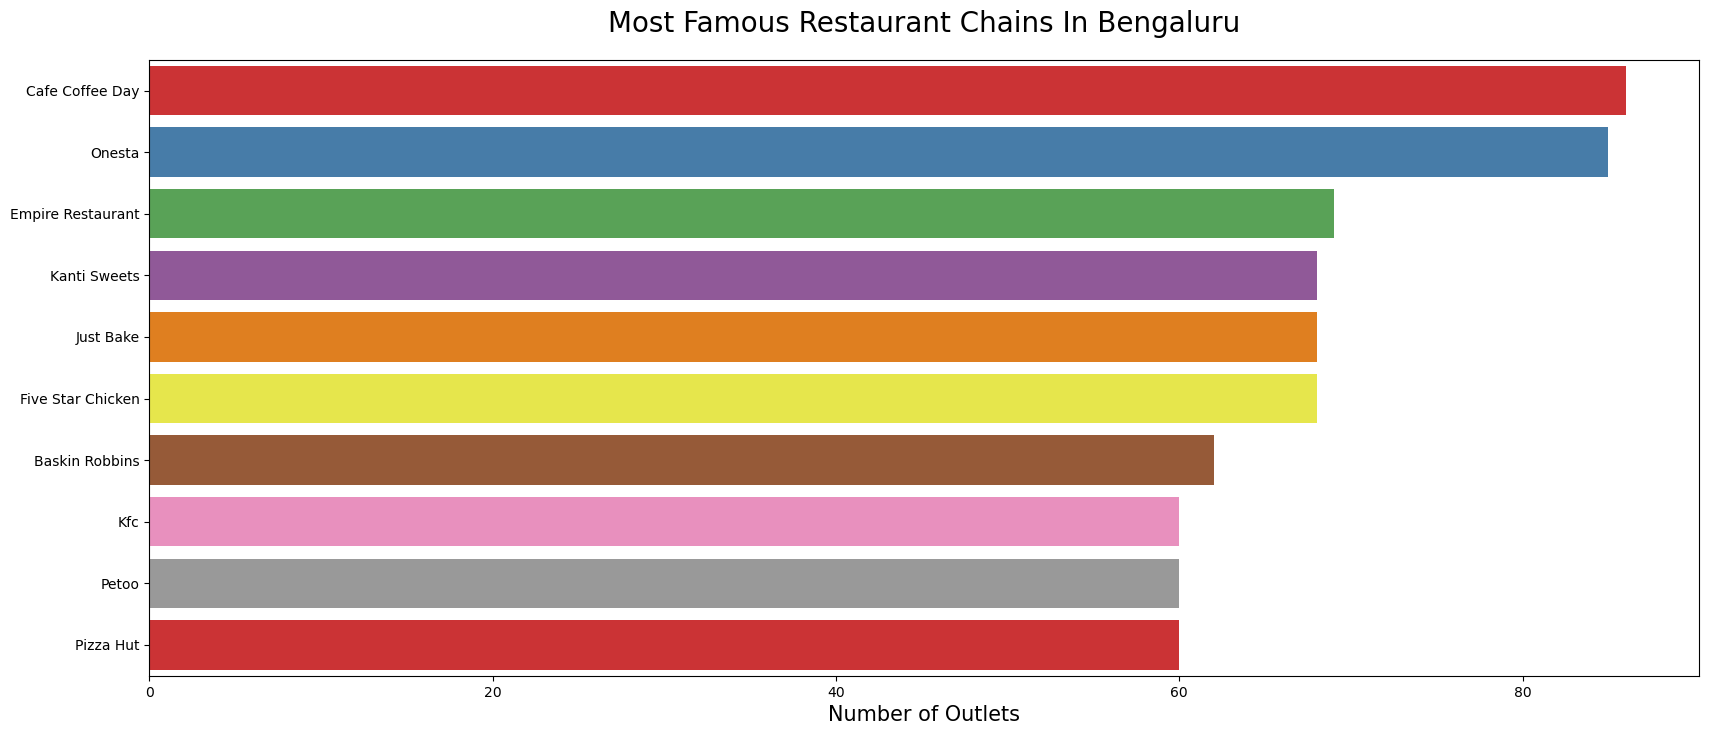

In [31]:
# Most famous restaurant chainn in bengaluru
plt.figure(figsize = [20, 8])
chains = new_zomato['name'].value_counts()[:10]
sns.barplot(x = chains, y = chains.index, palette = 'Set1')
plt.title('Most Famous Restaurant Chains In Bengaluru', size = 20, pad = 20)
plt.xlabel('Number of Outlets', size = 15)